   feature_1  feature_2  feature_3  feature_4      target
0  -0.919424   0.473592  -1.062304   1.549934   17.305691
1  -0.321635  -0.349258  -0.348652   2.076748   51.089803
2  -2.123896  -0.599393  -0.839722  -0.525755 -267.251820
3  -1.070892  -0.857158   0.625667   0.482472 -163.311219
4  -0.082151   1.443765  -1.251539   1.117296  149.906391
Mean Squared Error: 4632.25

Feature Importances:
feature_1    0.532319
feature_2    0.266146
feature_4    0.183502
feature_3    0.018033
dtype: float64


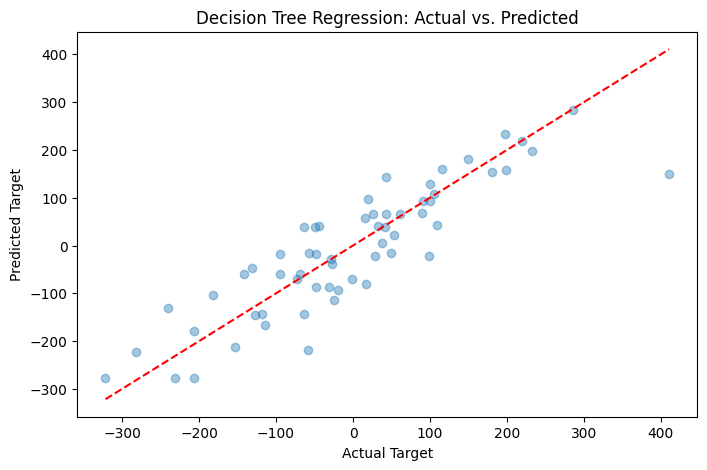

In [5]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Create a synthetic regression dataset
# We create 300 samples with 4 features and a bit of random noise
X, y = make_regression(n_samples=300, n_features=4, noise=25, random_state=42)

# Optionally: put in a DataFrame for easier viewing and handling
df = pd.DataFrame(X, columns=[f"feature_{i+1}" for i in range(X.shape[1])])
df['target'] = y

# Show the first few rows of data
print(df.head())

# Step 3: Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = tree.predict(X_test)

# Step 6: Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Feature importance analysis
feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
importance = pd.Series(tree.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances:")
print(importance)

# Step 8: Visualization - Actual vs. Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Decision Tree Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()
